Making a time series forecasting with the Help of ARIMA Model. 

more about ARIMA Model can be found out at: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/


ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.7MB/s 
     |████████████████████████████████| 2.1MB 24.7MB/s 
     |████████████████████████████████| 9.5MB 41.9MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [2]:
from nsepy import get_history as gh
import datetime as dt

In [89]:
#Setting start and end dates and fetching the historical data
start = dt.datetime(2013,1,1)
end = dt.datetime.now()
df = gh(symbol='AUROPHARMA',start=start,end=end)

In [90]:
df = df[['Close']]
df.Close

Date
2013-01-01    193.45
2013-01-02    201.70
2013-01-03    202.20
2013-01-04    201.65
2013-01-07    201.60
               ...  
2021-03-16    840.95
2021-03-17    839.30
2021-03-18    807.90
2021-03-19    822.25
2021-03-22    835.25
Name: Close, Length: 2035, dtype: float64

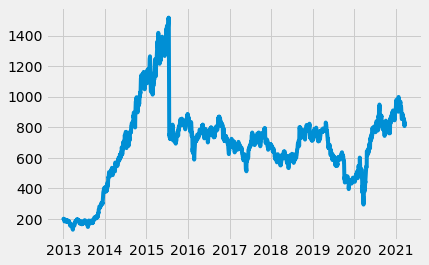

In [91]:
# df = pd.read_csv('/content/hdfc_data.csv')
# df = df[['Date', 'Close']]
# df.index = df['Date']
# df.index = pd.to_datetime(df.index)
# df.drop(['Date'], axis=1)
plt.plot(df.index, df.Close)

In [92]:

from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
	dftest = adfuller(dataset, autolag='AIC')
	print("1. ADF ", dftest[0])
	print("2. P value: ", dftest[1])
	print("3. Num of Lags : ", dftest[2])
	print("4. Num of obs used for adf regression and critical values Calculation: ", dftest[3])
	print("5. Critical Values: ", dftest[4])

	for key, val in dftest[4].items():
		print("\t", key, " : ", val)



ad_test(df['Close'])



1. ADF  -2.31818001066631
2. P value:  0.16617157652398978
3. Num of Lags :  5
4. Num of obs used for adf regression and critical values Calculation:  2029
5. Critical Values:  {'1%': -3.433577004601062, '5%': -2.862965528076955, '10%': -2.5675288883320975}
	 1%  :  -3.433577004601062
	 5%  :  -2.862965528076955
	 10%  :  -2.5675288883320975


In [93]:

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


stepwise_fir = auto_arima(df.Close, trace=True, supress_warnings=True, start_p = 4)
stepwise_fir.summary()


Performing stepwise search to minimize aic
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=18674.661, Time=10.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18681.614, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18683.474, Time=0.84 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18683.461, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18679.970, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18681.297, Time=12.74 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=18682.153, Time=11.36 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=18683.705, Time=21.00 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=18683.811, Time=17.96 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18681.380, Time=7.21 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18682.243, Time=18.23 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=18682.604, Time=14.01 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=18674.450, Time=21.59 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=18676.693, Time=21.90 sec
 ARIMA(4,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2035
Model:               SARIMAX(5, 1, 3)   Log Likelihood               -9327.376
Date:                Tue, 23 Mar 2021   AIC                          18672.753
Time:                        15:38:39   BIC                          18723.313
Sample:                             0   HQIC                         18691.301
                               - 2035                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3594      0.185     -1.948      0.051      -0.721       0.002
ar.L2         -0.6450      0.090     -7.206      0.000      -0.820      -0.470
ar.L3         -0.7253      0.175     -4.150      0.000      -1.068      -0.383
ar.L4         -0.0028      0.027     -0.103      0.918      -0.056       0.051
ar.L5         -0.0840      0.023     -3.670      0.000      -0.129      -0.039
ma.L1          0.3690      0.185      1.994      0.046       0.006       0.732
ma.L2          0.6117      0.087      7.059      0.000       0.442       0.782
ma.L3          0.7098      0.180      3.936      0.000       0.356       1.063
sigma2       563.2955      2.829    199.142      0.000     557.752     568.839
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          18097853.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                           -14.79
Prob(H) (two-sided):                  0.00   Kurtosis:                       464.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:



from statsmodels.tsa.arima_model import ARIMA


print(df.shape)
train=df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)
model = ARIMA(train.Close, order=(5,1,3))
model = model.fit()
print(model.summary())


(2035, 1)
(2005, 1) (30, 1)
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2004
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -9199.082
Method:                       css-mle   S.D. of innovations             23.841
Date:                Tue, 23 Mar 2021   AIC                          18418.165
Time:                        15:38:59   BIC                          18474.194
Sample:                             1   HQIC                         18438.736
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3710      0.508      0.730      0.465      -0.625       1.367
ar.L1.D.Close    -0.3635      0.108     -3.356      0.001      -0.576      -0.151
ar.L2.D.Clos

<AxesSubplot:>

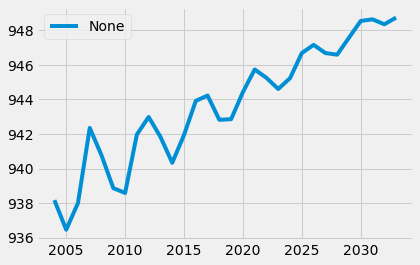

In [98]:

start = len(train)
end = len(train)+ len(test) -1
pred = model.predict(start=start, end=end, typ="levels")
# print(pred)
# pred.index = df.index[start:end+1]
pred.plot(legend=True)
# print(test)
# test['Close'].plot()
# plt.show()


In [96]:

print(test.Close.mean())
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred, test.Close))
print("The rmse is ", rmse)


880.3433333333334
The rmse is  78.26767487651958


In [99]:

print(type(df.Close))
model2 = ARIMA(df.Close, order=(0,1,0))
model2 = model2.fit()
print(df.tail())



<class 'pandas.core.series.Series'>
             Close
Date              
2021-03-16  840.95
2021-03-17  839.30
2021-03-18  807.90
2021-03-19  822.25
2021-03-22  835.25


DatetimeIndex(['2021-03-23 15:42:37.010431', '2021-03-24 15:42:37.010431',
               '2021-03-25 15:42:37.010431', '2021-03-26 15:42:37.010431',
               '2021-03-27 15:42:37.010431', '2021-03-28 15:42:37.010431',
               '2021-03-29 15:42:37.010431', '2021-03-30 15:42:37.010431',
               '2021-03-31 15:42:37.010431', '2021-04-01 15:42:37.010431',
               '2021-04-02 15:42:37.010431'],
              dtype='datetime64[ns]', freq='D')
2034    835.565536
2035    835.881072
2036    836.196608
2037    836.512144
2038    836.827679
2039    837.143215
2040    837.458751
2041    837.774287
2042    838.089823
2043    838.405359
2044    838.720895
Name: ARIMA PREDICTIONS, dtype: float64


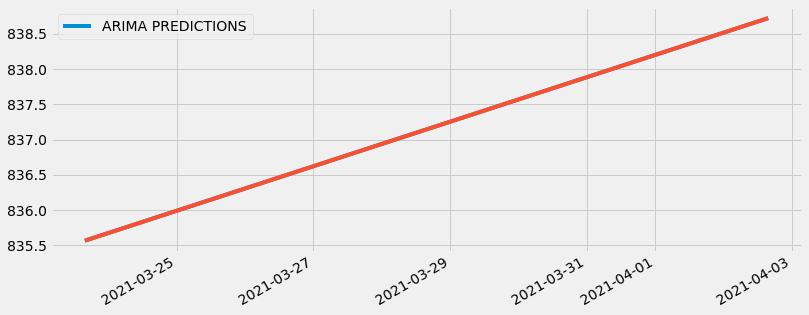

In [107]:


import datetime as dt
# Future dates
index_future_dates = pd.date_range(start = dt.datetime.now() , end=dt.datetime.now() + dt.timedelta(days=10))

print(index_future_dates)
pred = model2.predict(start=len(df), end=len(df)+10, typ='levels').rename('ARIMA PREDICTIONS')
print(pred)

pred.index = index_future_dates
pred.plot(figsize=(12,5), legend =True)
plt.plot(pred)

In [101]:
model2.save('AUROPHARMA_model.pkl')

In [55]:
from statsmodels.tsa.arima_model import ARIMAResults

<AxesSubplot:>

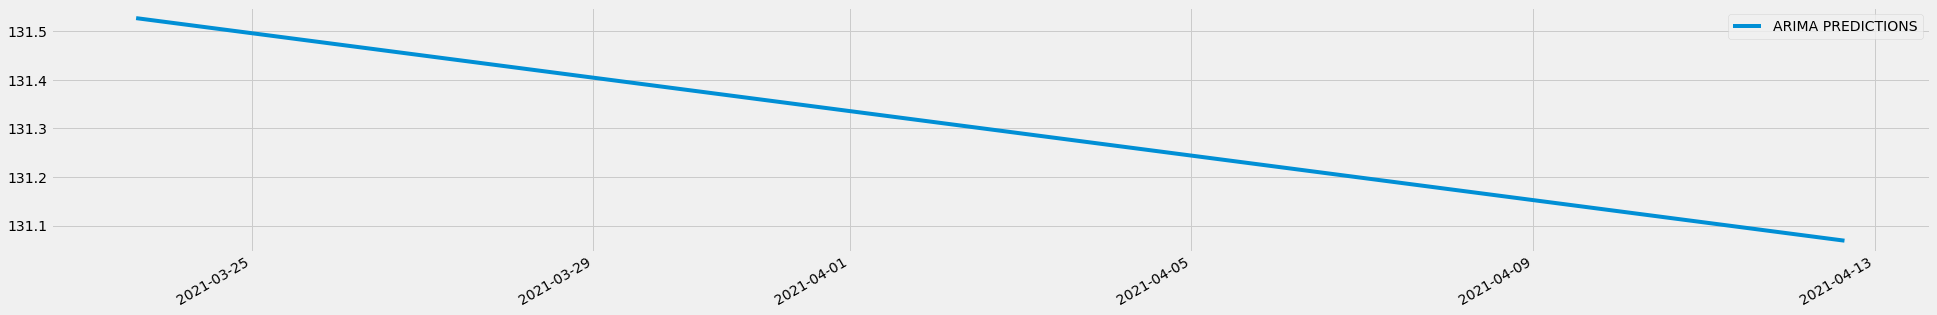

In [88]:
loaded = ARIMAResults.load('AUROPHARMA_model.pkl')
index_future_dates = pd.date_range(start = dt.datetime.now() , end=dt.datetime.now() + dt.timedelta(days=20))

pred = loaded.predict(start=len(df), end=len(df)+20, typ='levels').rename('ARIMA PREDICTIONS')

pred.index = index_future_dates
pred.plot(figsize=(30,5), legend =True)